This is a mini python EDA based on the [Goodreads Best Book of 2023 data set](https://www.kaggle.com/datasets/brzy56/goodreads-choice-awards-2023-best-books-of-2023)
Readers voted on the nominated books, above 5M votes were casted in 2023 across 15 genres. A total of 299 books made it to the final list. 
The project covers basic steps in the data analysis process such as reading, analysing, cleaning and grouping data.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings('ignore')
plt.style.use("default")

In [7]:
# Read Data

df = pd.read_csv('/home/gerri/Documents/ShareFiles/Datasets/Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv')

In [8]:
# Check a random sample of the data
df.sample(10)

,source_URL,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,Book Description,First Published date,Kindle Version and Price,Kindle Price,About the Author
129,https://www.goodreads.com/book/show/61030535-c...,13494,Science Fiction,Children of Memory,Adrian Tchaikovsky,4.05,"14,182","1,525",503,Paperback,The modern classic of space opera that began w...,31-Jan-23,Kindle $9.99,9.99,ADRIAN TCHAIKOVSKY was born in Lincolnshire an...
255,https://www.goodreads.com/book/show/62837289-b...,2615,Memoir & Autobiography,Becoming Free Indeed: My Story of Disentanglin...,Jinger Duggar Vuolo,3.61,"30,253","3,407",221,Hardcover,"New York Times Bestseller Jinger Vuolo, the si...",31-Jan-23,Kindle $14.99,14.99,Jinger Vuolo grew up on TV. From the age of 9 ...
284,https://www.goodreads.com/book/show/59903149-s...,15883,Humor,Strong Female Character,Fern Brady,4.57,"11,698","1,348",288,Hardcover,'This is a book about how being a woman gets i...,14-Feb-23,Kindle $12.99,12.99,NaN
88,https://www.goodreads.com/book/show/61150440-a...,10128,Romantasy,A Fire in the Flesh,Jennifer L. Armentrout,4.11,"26,110","2,914",632,Kindle Edition,The only thing that can save the realms now is...,31-Oct-23,Kindle $7.99,7.99,Hey Guys! Please note: I don't send out ARCs f...
147,https://www.goodreads.com/book/show/63249718-s...,15389,Horror,Silver Nitrate,Silvia Moreno-Garcia,3.65,"13,743","3,220",323,Hardcover,From the New York Times bestselling author of ...,18-Jul-23,Kindle $1.99,1.99,Silvia Moreno-Garcia is the author of several ...
293,https://www.goodreads.com/book/show/65214162-s...,2969,Humor,Surely You Can't Be Serious: The True Story of...,David Zucker|Jim Abrahams|Jerry Zucker,4.25,844,198,352,Hardcover,Surely You Can't Be Serious is an in-depth and...,3-Oct-23,Kindle $16.99,16.99,NaN
260,https://www.goodreads.com/book/show/101160753-...,24315,History & Biography,The Six: The Untold Story of America's First W...,Loren Grush,4.41,"1,241",270,432,Hardcover,In the bestselling tradition of Hidden Figures...,5-Sep-23,Kindle $16.99,16.99,"Loren Grush is a space reporter for Bloomberg,..."
111,https://www.goodreads.com/book/show/61612864-t...,8313,Fantasy,The Book That Wouldn’t Burn,Mark Lawrence,4.13,"9,597","1,864",576,Hardcover,A boy has lived his whole life trapped within ...,1-May-23,Kindle $14.99,14.99,My books vary a LOT - so \n here's a handy gu...
60,https://www.goodreads.com/book/show/61718053-h...,157687,Romance,Happy Place,Emily Henry,4.05,"599,665","75,814",400,Hardcover,Harriet and Wyn have been the perfect couple s...,25-Apr-23,Kindle $11.99,11.99,Emily Henry is the #1 New York Times bestselli...
291,https://www.goodreads.com/book/show/61349388-i...,3759,Humor,It Was an Ugly Couch Anyway: And Other Thought...,Elizabeth Passarella,4.07,"1,998",353,256,Paperback,A collection of refreshingly honest and hilari...,2-May-23,Kindle $12.99,12.99,Elizabeth Passarella is the author of the essa...


In [9]:
# Remove columns deemed unnecesary. Despite being an optional step it would help reducing the size of the DataFrame.

df.drop(['source_URL','Book Description','About the Author'], axis=1, inplace=True)

In [10]:
# Review summary statistics for numeric columns

df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Pages,Kindle Price
count,299.000000,299.000000,299.000000,299.000000
mean,19662.919732,4.063512,392.394649,11.327926
std,32406.337679,0.252188,123.698044,5.351909
min,935.000000,3.520000,192.000000,0.000000
25%,3591.000000,3.855000,320.000000,9.990000
50%,10099.000000,4.060000,368.000000,13.990000
75%,24714.000000,4.250000,432.000000,14.990000
max,397565.000000,4.750000,1242.000000,17.990000


In [11]:
# Fetch information regarding the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Readers Choice Votes      299 non-null    int64  
 1   Readers Choice Category   299 non-null    object 
 2   Title                     299 non-null    object 
 3   Author                    299 non-null    object 
 4   Total Avg Rating          299 non-null    float64
 5   Number of Ratings         299 non-null    object 
 6   Number of Reviews         299 non-null    object 
 7   Number of Pages           299 non-null    int64  
 8   Edition                   299 non-null    object 
 9   First Published date      299 non-null    object 
 10  Kindle Version and Price  299 non-null    object 
 11  Kindle Price              299 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 28.2+ KB


In [13]:
# The ',' is used as a thousands separator, it would be safest to remove it. We will directly cast them as int32 to make our DataFrame more efficient.

num_col= ['Number of Ratings', 'Number of Reviews']

for col in num_col:
    df[col] = df[col].replace(',','',regex=True).astype('int32')

In [14]:
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Kindle Price
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,19662.919732,4.063512,38748.351171,5241.705686,392.394649,11.327926
std,32406.337679,0.252188,79586.655592,10800.069660,123.698044,5.351909
min,935.000000,3.520000,228.000000,71.000000,192.000000,0.000000
25%,3591.000000,3.855000,5516.500000,952.000000,320.000000,9.990000
50%,10099.000000,4.060000,14519.000000,2469.000000,368.000000,13.990000
75%,24714.000000,4.250000,37143.000000,5109.500000,432.000000,14.990000
max,397565.000000,4.750000,930928.000000,141668.000000,1242.000000,17.990000


In [15]:
# Convert columns to the correct data types

convert_dict = {'Readers Choice Votes': 'int32',
                'Readers Choice Category': 'category',
                'Title': 'string',
                'Author': 'string',
                'Total Avg Rating': 'float16',
                'Number of Pages': 'int16',
                'Edition': 'category',
                'First Published date': 'datetime64[ns]',
                'Kindle Price': 'float16'}
df = df.astype(convert_dict)
df.sample(15)

,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price
265,14246,History & Biography,A Fever in the Heartland: The Ku Klux Klan's P...,Timothy Egan,4.398438,14489,2304,432,Hardcover,2023-04-04,Kindle $14.99,14.992188
128,15123,Science Fiction,The Future,Naomi Alderman,3.880859,3780,995,432,Hardcover,2023-11-07,Kindle $14.99,14.992188
18,2611,Fiction,Blackouts,Justin Torres,3.960938,1752,376,306,Hardcover,2023-10-10,Kindle $14.99,14.992188
142,22580,Horror,A House with Good Bones,T. Kingfisher,3.720703,25131,4707,247,Hardcover,2023-03-28,Kindle $13.99,13.992188
41,73187,Mystery & Thriller,None of This Is True,Lisa Jewell,4.179688,215003,24754,384,Hardcover,2023-07-20,Kindle $14.99,14.992188
292,3145,Humor,Everybody's Favorite: Tales from the World's W...,Lillian Stone,3.519531,755,152,224,Hardcover,2023-07-18,Kindle $12.99,12.992188
23,33221,Historical Fiction,The Heaven & Earth Grocery Store,James McBride,4.230469,39885,4464,385,Hardcover,2023-08-08,Kindle $14.99,14.992188
31,6708,Historical Fiction,The Paris Daughter,Kristin Harmel,4.289062,25885,2874,384,Hardcover,2023-06-06,Kindle $12.99,12.992188
260,24315,History & Biography,The Six: The Untold Story of America's First W...,Loren Grush,4.410156,1241,270,432,Hardcover,2023-09-05,Kindle $16.99,16.984375
17,2983,Fiction,Wellness,Nathan Hill,4.039062,13446,2018,624,Hardcover,2023-09-26,Kindle $14.99,14.992188


In [16]:
# As there is a high correlation between the Kindle Version and Price column with the Kindle Price column, we'll remove price from the former and rename it to Kindle Version
df['Kindle Version'] = df['Kindle Version and Price'].str.extract('([a-zA-Z ]+)',expand=False).str.strip()

# Assign the correct format to the column
df['Kindle Version']=df['Kindle Version'].astype('category')

# Drop the no longer needed column
df = df.drop('Kindle Version and Price', axis=1)
df.sample(15)
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,First Published date,Kindle Price
count,299.000000,299.000000,299.000000,299.000000,299.000000,299,299.000000
mean,19662.919732,4.062500,38748.351171,5241.705686,392.394649,2023-05-19 09:57:11.438127104,11.328125
min,935.000000,3.519531,228.000000,71.000000,192.000000,2019-11-27 00:00:00,0.000000
25%,3591.000000,3.854492,5516.500000,952.000000,320.000000,2023-02-28 12:00:00,9.992188
50%,10099.000000,4.058594,14519.000000,2469.000000,368.000000,2023-05-16 00:00:00,13.992188
75%,24714.000000,4.250000,37143.000000,5109.500000,432.000000,2023-08-29 00:00:00,14.992188
max,397565.000000,4.750000,930928.000000,141668.000000,1242.000000,2023-11-13 00:00:00,17.984375
std,32406.337679,0.252197,79586.655592,10800.069660,123.698044,NaN,5.351562


In [17]:
# Last check prior to visualizing the data

df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Readers Choice Votes     299 non-null    int32         
 1   Readers Choice Category  299 non-null    category      
 2   Title                    299 non-null    string        
 3   Author                   299 non-null    string        
 4   Total Avg Rating         299 non-null    float16       
 5   Number of Ratings        299 non-null    int32         
 6   Number of Reviews        299 non-null    int32         
 7   Number of Pages          299 non-null    int16         
 8   Edition                  299 non-null    category      
 9   First Published date     299 non-null    datetime64[ns]
 10  Kindle Price             299 non-null    float16       
 11  Kindle Version           299 non-null    category      
dtypes: category(3), datetime64[ns](1), f

,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Price,Kindle Version
53,6741,Mystery & Thriller,After That Night,Karin Slaughter,4.359375,27413,2646,432,Hardcover,2023-08-22,14.992188,Kindle
10,7486,Fiction,Big Swiss,Jen Beagin,3.699219,39021,6532,336,Hardcover,2023-02-07,12.992188,Kindle
208,18208,Debut Novel,The Bandit Queens,Parini Shroff,3.929688,24751,3743,342,Hardcover,2023-01-03,13.992188,Kindle
215,3597,Debut Novel,Banyan Moon,Thao Thai,3.949219,15611,1688,336,Hardcover,2023-06-27,14.992188,Kindle
60,157687,Romance,Happy Place,Emily Henry,4.050781,599665,75814,400,Hardcover,2023-04-25,11.992188,Kindle
264,17288,History & Biography,Black AF History: The Un-Whitewashed Story of ...,Michael Harriot,4.519531,976,217,432,Hardcover,2023-09-19,13.992188,Kindle
145,16442,Horror,My Darling Girl,Jennifer McMahon,3.810547,7286,1386,320,Hardcover,2023-10-03,14.992188,Kindle
97,1738,Romantasy,A Queen of Thieves & Chaos,K.A. Tucker,4.269531,2846,465,606,Kindle Edition,2023-09-05,5.988281,Kindle
175,2889,Young Adult Fantasy & Science Fiction,Blood Debts,Terry J. Benton-Walker,3.789062,2257,889,416,Hardcover,2023-04-04,10.992188,Kindle
275,2516,History & Biography,The Confidante: The Untold Story of the Woman ...,Christopher C. Gorham,4.328125,1418,305,384,Hardcover,2023-02-21,0.000000,Kindle Unlimited


Readers Choice Category
Fantasy                                  20
Fiction                                  20
Historical Fiction                       20
History & Biography                      20
Horror                                   20
Humor                                    20
Memoir & Autobiography                   20
Mystery & Thriller                       20
Nonfiction                               20
Romance                                  20
Romantasy                                20
Science Fiction                          20
Young Adult Fantasy & Science Fiction    20
Young Adult Fiction                      20
Debut Novel                              19
Name: count, dtype: int64


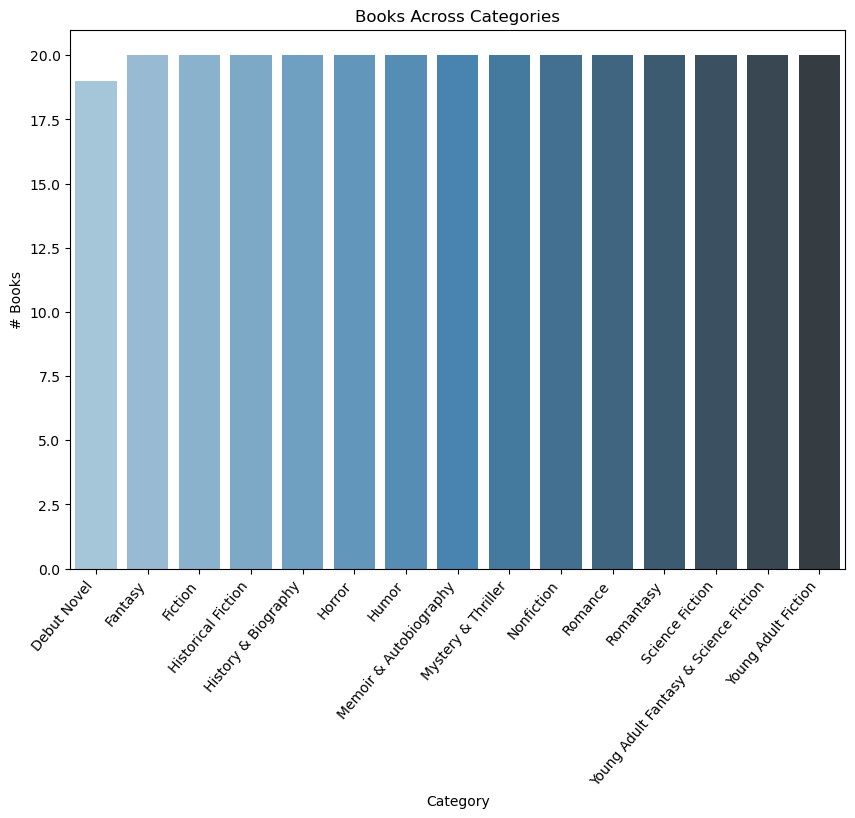

In [19]:
# Category distribution

cat_cnt = df['Readers Choice Category'].value_counts()
print(cat_cnt)

plt.figure(figsize=(10, 7))
sns.barplot(x=cat_cnt.index, y=cat_cnt.values, palette = 'Blues_d')
plt.title('Books Across Categories')
plt.xlabel('Category')
plt.ylabel('# Books')
plt.xticks(rotation=50, ha='right')
plt.show()

The data seems to be evenly distributed across all categories except Debut Novel which has 19 books, opposed to 20 in the remaining categories.

In [20]:
# Define columns aggregation

aggs = {'Readers Choice Votes': 'sum', 
                'Total Avg Rating': 'mean',
               'Number of Ratings': 'sum',
               'Number of Reviews': 'sum',
                'Number of Pages': 'median',
                'Kindle Price': 'median',
               }

# Group by book category

cat_vote = df.groupby('Readers Choice Category').agg(aggs).sort_values('Readers Choice Votes', ascending=False)

# Calculate the share of total votes, total ratings, and total reviews for each category

tot_votes = cat_vote['Readers Choice Votes'].sum()
tot_ratings = cat_vote['Number of Ratings'].sum()
tot_reviews = cat_vote['Number of Reviews'].sum()
share_of_tot_votes = (cat_vote['Readers Choice Votes'] / tot_votes) * 100
share_of_tot_ratings = (cat_vote['Number of Ratings'] / tot_ratings) * 100
share_of_tot_reviews = (cat_vote['Number of Reviews'] / tot_reviews) * 100

In [23]:
# Create a separate df of Votes, Ratings, and Reviews
result_df = pd.DataFrame({
    'Votes': cat_vote['Readers Choice Votes'], 
    '% Votes': share_of_tot_votes, 
    'Avg Ratings': cat_vote['Total Avg Rating'].round(2),
    '# Ratings': cat_vote['Number of Ratings'],
    '% of Total Ratings': share_of_tot_ratings.round(2),
    '# Reviews': cat_vote['Number of Reviews'],
    '% of Total Reviews': share_of_tot_reviews.round(2),
    'Median Pages': cat_vote['Number of Pages'],
    'Median Kindle Price': cat_vote['Kindle Price'].round(2)
    })

# Most voted category

max_voted_cat = result_df['Votes'].idxmax()
max_votes = result_df['Votes'].max()
avg_rat = result_df.loc[max_voted_cat, 'Avg Ratings']

# Most rated category

max_rated_cat = result_df['# Ratings'].idxmax()
max_rates = result_df['# Ratings'].max()
pct_max_rates = result_df['% of Total Ratings'].max()

# Most reviewed category
max_reviewed_cat = result_df['# Reviews'].idxmax()
max_reviews = result_df['# Reviews'].max()
pct_max_reviews = result_df['% of Total Reviews'].max()

In [25]:
# Print results 
print(f"The category '{max_voted_cat}' is the most voted category of 2023, with {max_votes:,} votes")
print(f"The category '{max_rated_cat}' is the most rated category of 2023, having an average rating of {format(avg_rat, '.2f')}, and # ratings: {max_rates:,}, or {format(pct_max_rates, '.2f')}% of total ratings")
print(f"The category '{max_reviewed_cat}' is the most reviewed category of 2023, with {max_reviews:,} reviews, or {format(pct_max_reviews, '.2f')}% of all reviews")


The category 'Romance' is the most voted category of 2023, with 645,601 votes
The category 'Romance' is the most rated category of 2023, having an average rating of 4.05, and # ratings: 2,737,676, or 23.63% of total ratings
The category 'Romance' is the most reviewed category of 2023, with 336,747 reviews, or 21.49% of all reviews


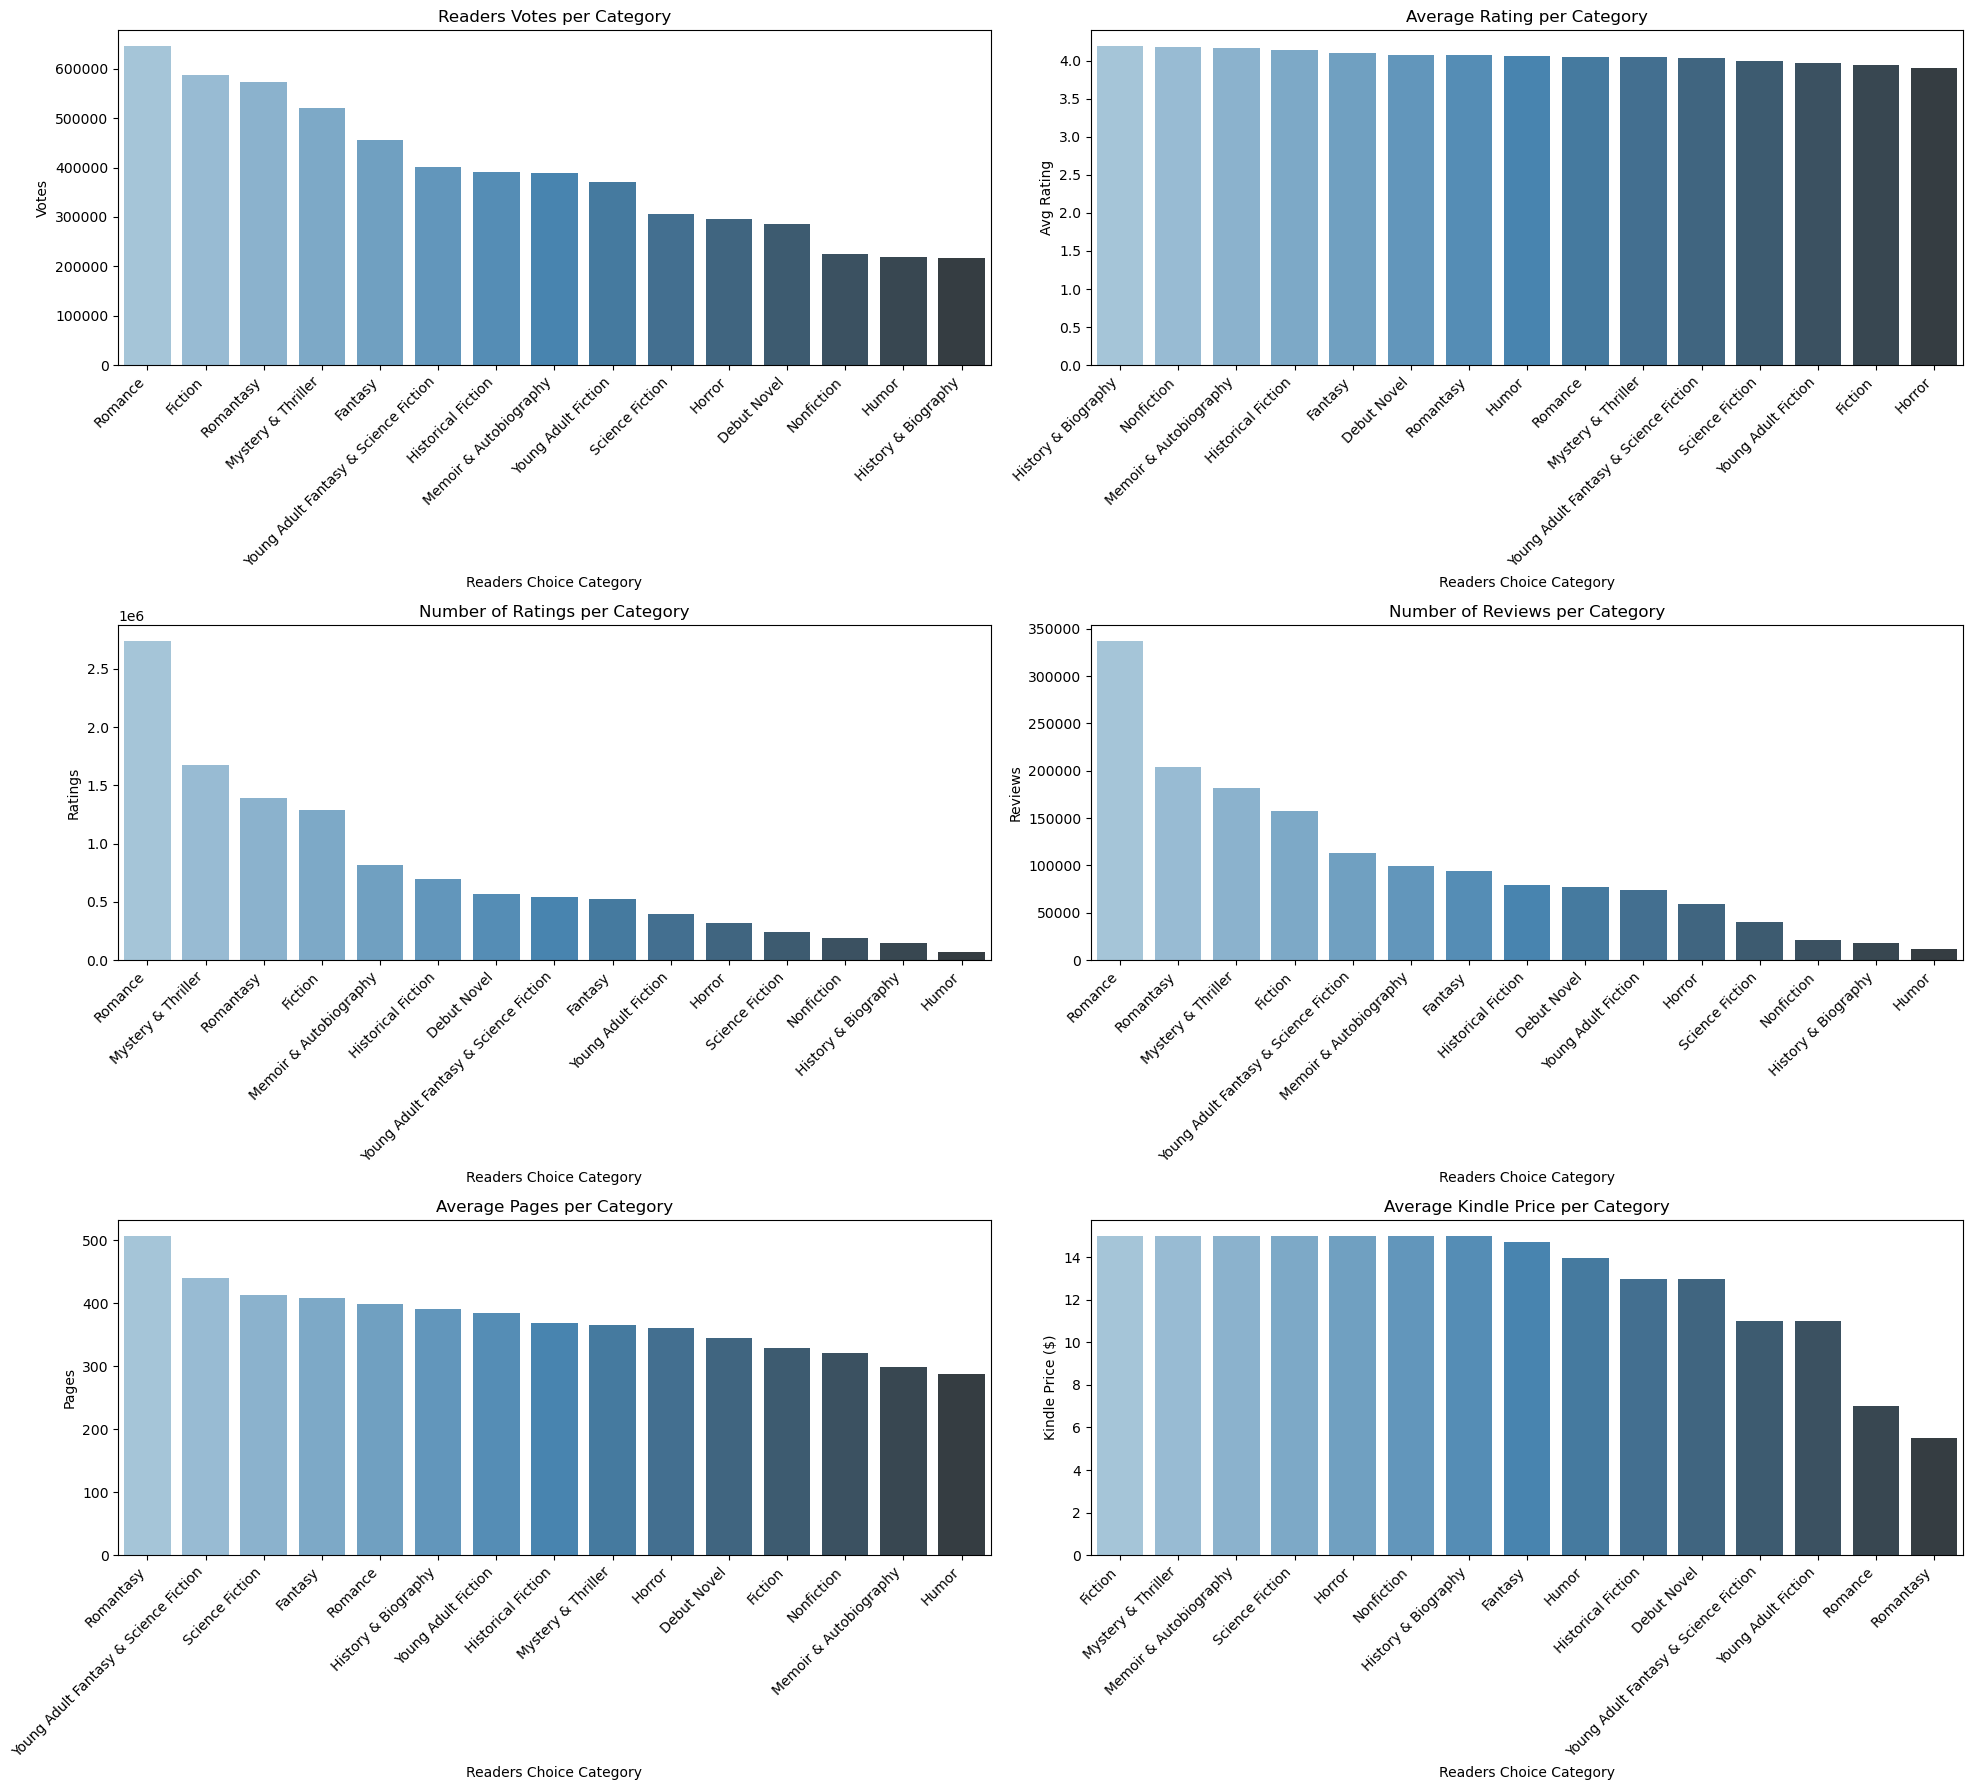

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(20, 18), sharey=False)

# First plot
sns.barplot(x=result_df.index, y=result_df['Votes'], palette='Blues_d', order=result_df.index, ax=axes[0, 0])
axes[0, 0].set_title('Readers Votes per Category')
axes[0, 0].set_ylabel('Votes')
axes[0, 0].set_xticklabels(labels=result_df.index, rotation=45, ha='right')

# Second plot
result_df_sorted = result_df.sort_values(by='Avg Ratings', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Avg Ratings'], palette='Blues_d', order=result_df_sorted.index, ax=axes[0, 1])
axes[0, 1].set_title('Average Rating per Category')
axes[0, 1].set_ylabel('Avg Rating')
axes[0, 1].set_xticklabels(labels=result_df_sorted.index, rotation=45, ha='right')

# Third plot
result_df_sorted = result_df.sort_values(by='# Ratings', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['# Ratings'], palette='Blues_d', order=result_df_sorted.index, ax=axes[1, 0])
axes[1, 0].set_title('Number of Ratings per Category')
axes[1, 0].set_ylabel('Ratings')
axes[1, 0].set_xticklabels(labels=result_df_sorted.index, rotation=45, ha='right')

# Fourth plot
result_df_sorted = result_df.sort_values(by='# Reviews', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['# Reviews'], palette='Blues_d', order=result_df_sorted.index, ax=axes[1, 1])
axes[1, 1].set_title('Number of Reviews per Category')
axes[1, 1].set_ylabel('Reviews')
axes[1, 1].set_xticklabels(labels=result_df_sorted.index, rotation=45, ha='right')

# Fifth plot
result_df_sorted = result_df.sort_values(by='Median Pages', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Median Pages'], palette='Blues_d', order=result_df_sorted.index, ax=axes[2, 0])
axes[2, 0].set_title('Average Pages per Category')
axes[2, 0].set_ylabel('Pages')
axes[2, 0].set_xticklabels(labels=result_df_sorted.index, rotation=45, ha='right')

# Sixth plot
result_df_sorted = result_df.sort_values(by='Median Kindle Price', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Median Kindle Price'], palette='Blues_d', order=result_df_sorted.index, ax=axes[2, 1])
axes[2, 1].set_title('Average Kindle Price per Category')
axes[2, 1].set_ylabel('Kindle Price ($)')
axes[2, 1].set_xticklabels(labels=result_df_sorted.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Despite not being the one with the highest average ratings, Romance has the title Most Popular Book Category in 2023. It beats the second category by twice the number. On the opposite side, Humor and History & Biography are the 2 least popular categories in 2023.

The price is identical across almost all categories, except Romance and Romantasy which have the lowest median price.

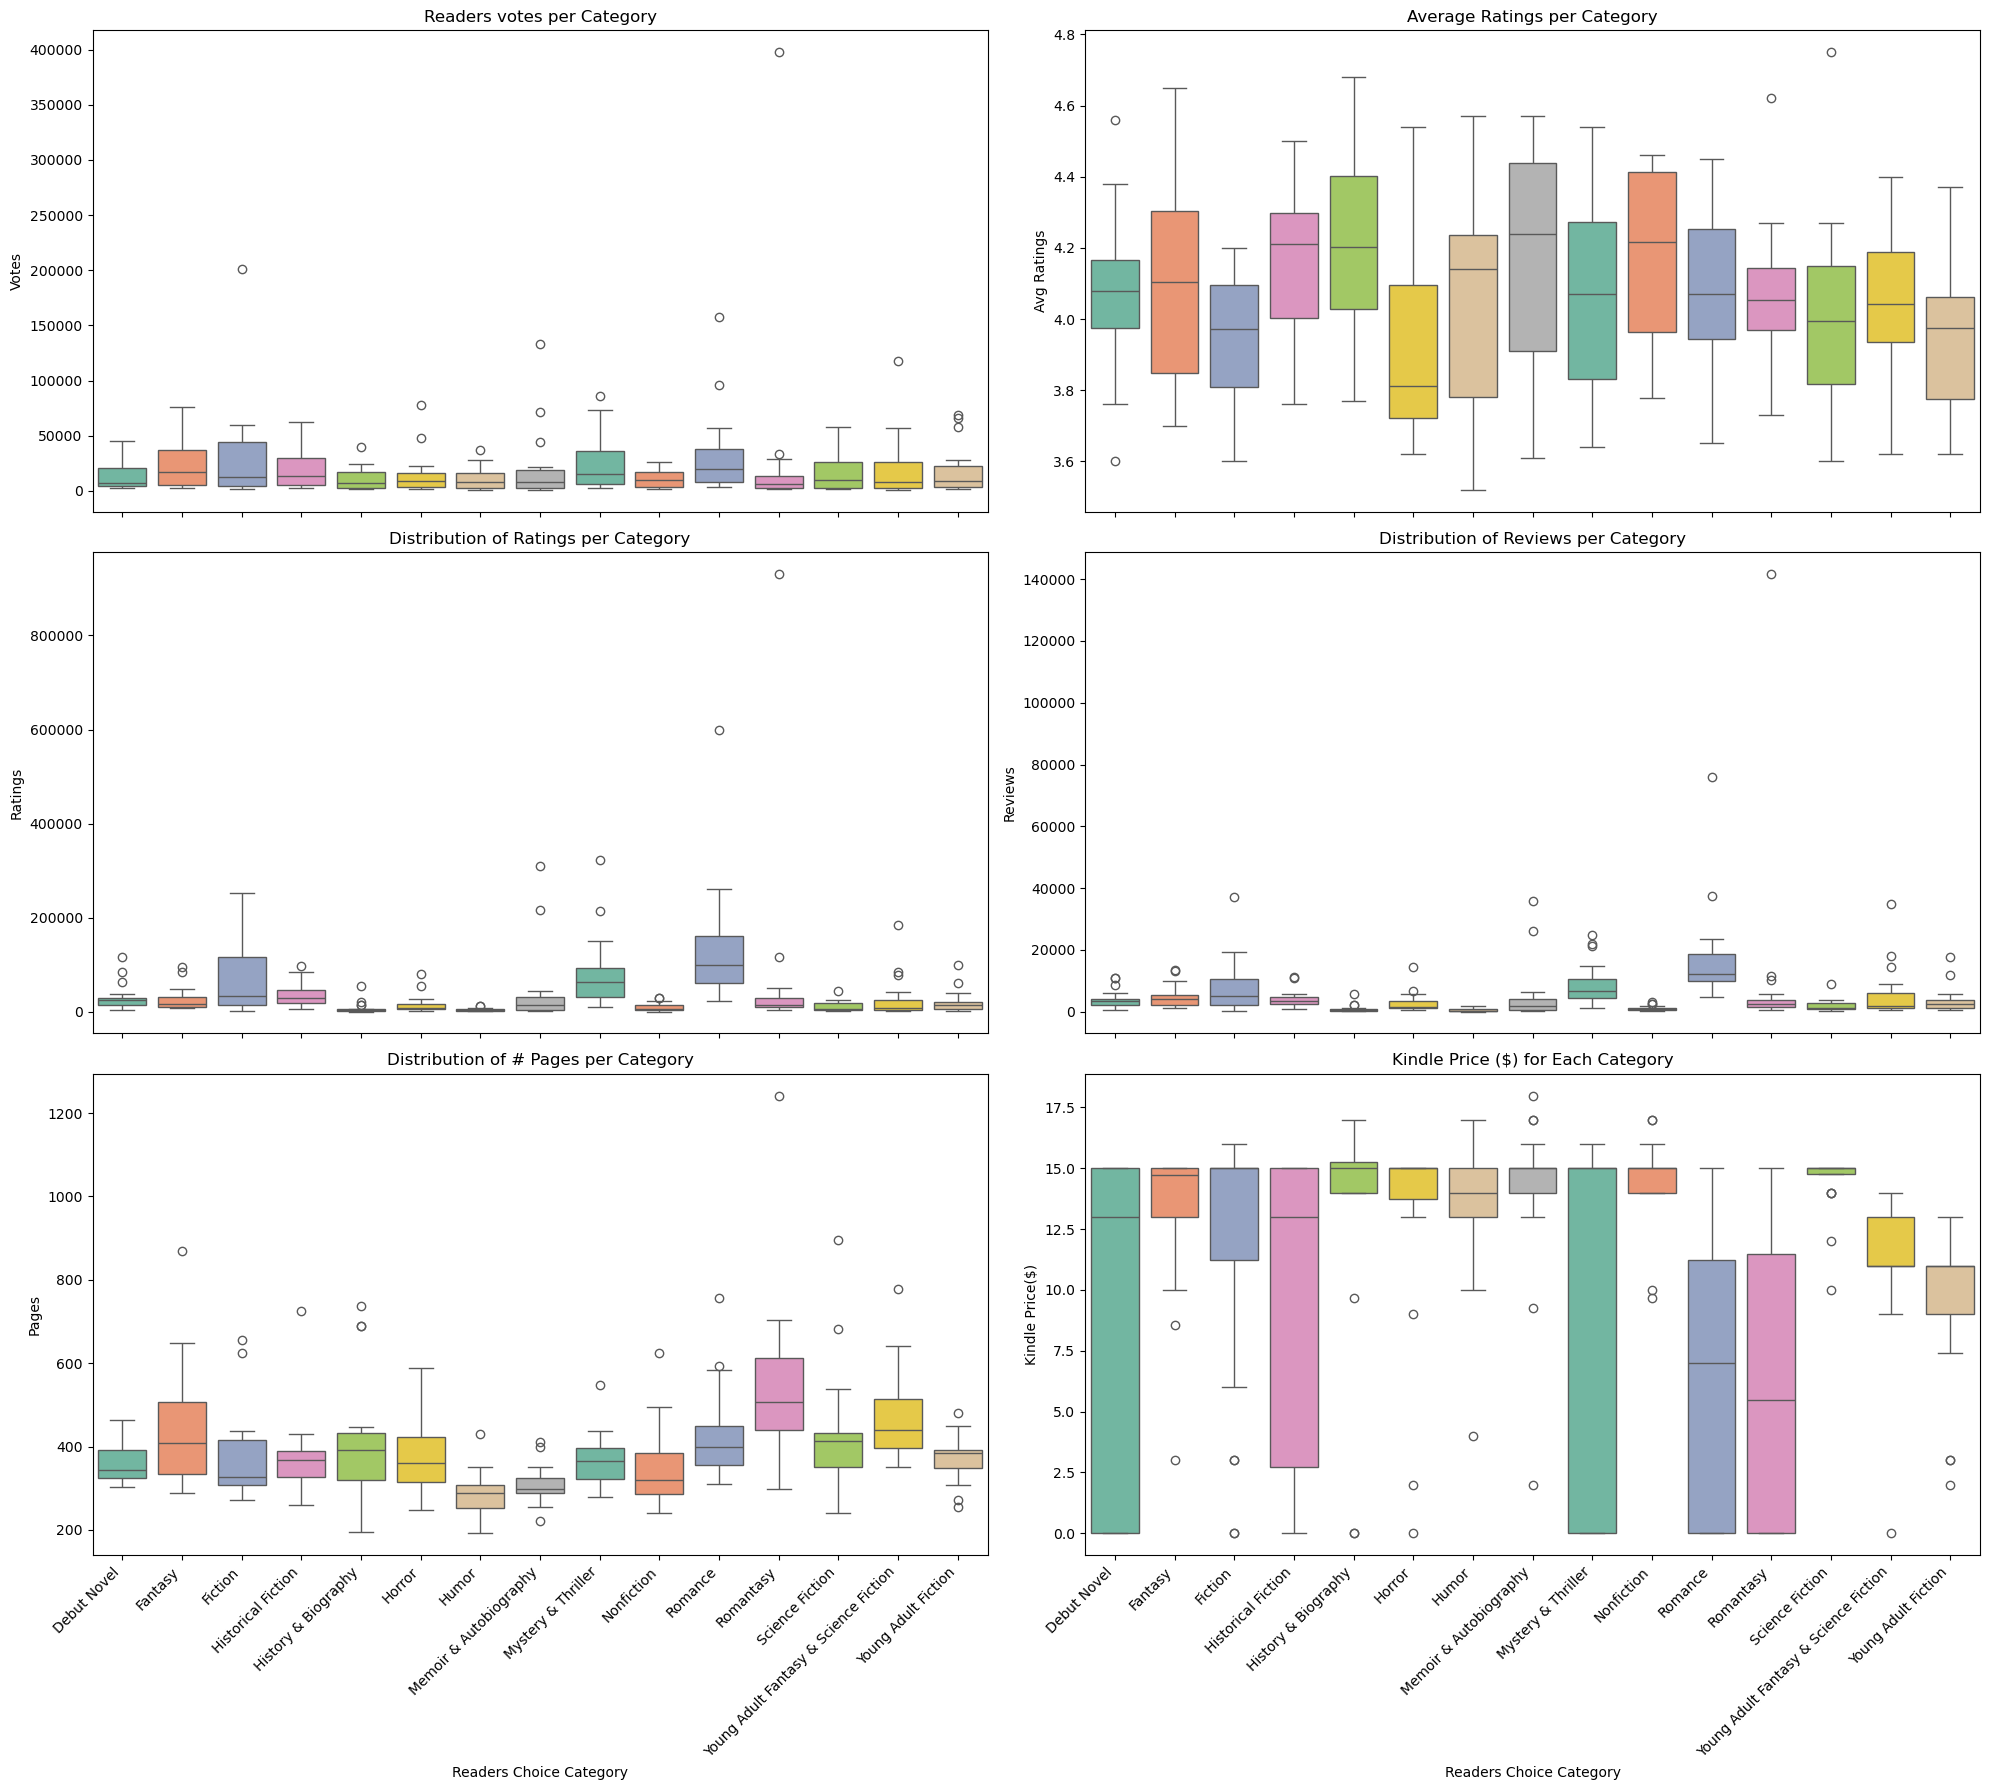

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(20, 18), sharey=False, sharex=True)

# First plot
sns.boxplot(data=df, x='Readers Choice Category', y='Readers Choice Votes', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Readers votes per Category')
axes[0, 0].set_ylabel('Votes')

# Second plot
sns.boxplot(data=df, x='Readers Choice Category', y='Total Avg Rating', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Average Ratings per Category')
axes[0, 1].set_ylabel('Avg Ratings')

# Third plot
sns.boxplot(data=df, x='Readers Choice Category', y='Number of Ratings', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Ratings per Category')
axes[1, 0].set_ylabel('Ratings')

# Fourth plot
sns.boxplot(data=df, x='Readers Choice Category', y='Number of Reviews', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Reviews per Category')
axes[1, 1].set_ylabel('Reviews')

# Fifth plot
sns.boxplot(data=df, x='Readers Choice Category', y='Number of Pages', palette='Set2', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of # Pages per Category')
axes[2, 0].set_ylabel('Pages')

# Sixth plot
sns.boxplot(data=df, x='Readers Choice Category', y='Kindle Price', palette='Set2', ax=axes[2, 1])
axes[2, 1].set_title('Kindle Price ($) for Each Category')
axes[2, 1].set_ylabel('Kindle Price($)')

for ax in axes[2, :]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
fig.tight_layout()
plt.show()

The only distribution which doesn't have extreme outliers in average ratings' which is normally distributed. Due to this we'll stick to using median as measure of central tendency since it is less sensitive to outliers.


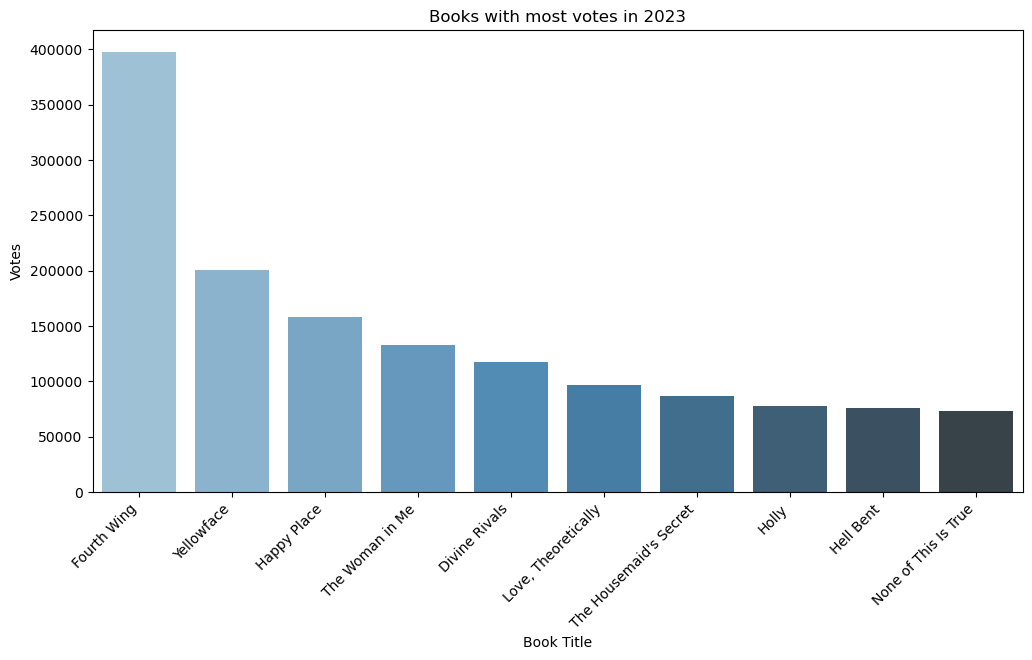

,Title,Readers Choice Category,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages
80,Fourth Wing,Romantasy,397565,4.621094,930928,141668,500
0,Yellowface,Fiction,200722,3.869141,252189,37032,336
60,Happy Place,Romance,157687,4.050781,599665,75814,400
239,The Woman in Me,Memoir & Autobiography,132867,4.050781,215178,26056,277
160,Divine Rivals,Young Adult Fantasy & Science Fiction,117671,4.261719,183916,34829,357
61,"Love, Theoretically",Romance,96439,4.160156,256083,37318,389
40,The Housemaid's Secret,Mystery & Thriller,86468,4.281250,321845,21398,318
140,Holly,Horror,77993,4.191406,54849,6818,449
100,Hell Bent,Fantasy,75800,4.160156,94667,13508,481
41,None of This Is True,Mystery & Thriller,73187,4.179688,215003,24754,384


In [44]:
# Books with most votes

most_voted_books = df[['Title', 'Readers Choice Category', 'Readers Choice Votes', 'Total Avg Rating', 'Number of Ratings', 'Number of Reviews', 'Number of Pages']].sort_values(by=['Readers Choice Votes', 'Number of Ratings', 'Number of Reviews'], ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=most_voted_books['Title'], y=most_voted_books['Readers Choice Votes'], data=most_voted_books, palette='Blues_d')
plt.title('Books with most votes in 2023')
plt.xlabel('Book Title')
plt.ylabel('Votes')
plt.xticks(rotation=45, ha='right')
plt.show()


most_voted_books

Fourth Wing is the Most Popular Book, receiving almost twice the votes as second place Yellowface. It takes over half of the votes just for the Romantasy category.

In [46]:
# Books with max votes per category

max_votes_ind = df.groupby('Readers Choice Category')['Readers Choice Votes'].idxmax()
titles_with_max_votes = df.loc[max_votes_ind, ['Readers Choice Category', 'Title', 'Readers Choice Votes', 'Total Avg Rating', 'Number of Ratings', 'Number of Reviews', 'Number of Pages']].sort_values('Readers Choice Votes', ascending=False).head(10)
titles_with_max_votes

,Readers Choice Category,Title,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages
80,Romantasy,Fourth Wing,397565,4.621094,930928,141668,500
0,Fiction,Yellowface,200722,3.869141,252189,37032,336
60,Romance,Happy Place,157687,4.050781,599665,75814,400
239,Memoir & Autobiography,The Woman in Me,132867,4.050781,215178,26056,277
160,Young Adult Fantasy & Science Fiction,Divine Rivals,117671,4.261719,183916,34829,357
40,Mystery & Thriller,The Housemaid's Secret,86468,4.281250,321845,21398,318
140,Horror,Holly,77993,4.191406,54849,6818,449
100,Fantasy,Hell Bent,75800,4.160156,94667,13508,481
180,Young Adult Fiction,Check & Mate,68736,4.058594,60351,11800,352
20,Historical Fiction,Weyward,62211,4.121094,83461,11008,329


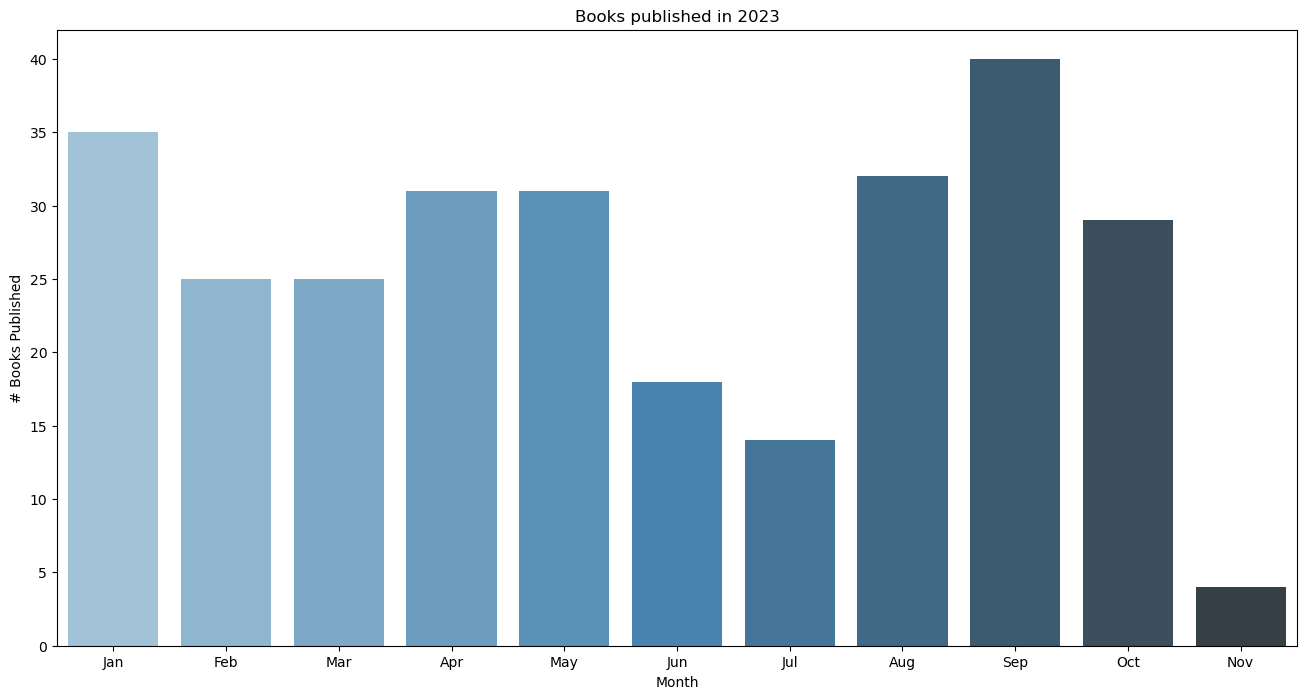

In [48]:
df['First Published date'] = pd.to_datetime(df['First Published date'])

# Fetch only books published in 2023
books_2023 = df[df['First Published date'].dt.year==2023]

# Get the distribution of released books per month

month_books=books_2023.groupby(books_2023['First Published date'].dt.month)['Title'].count().reset_index()
month_books['Month']=month_books['First Published date'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(16,8))
sns.barplot(data=month_books, x='Month', y='Title', palette='Blues_d')
plt.title('Books published in 2023')
plt.xlabel('Month')
plt.ylabel('# Books Published')
plt.show()

January and September are the 2 months when most books have been released.

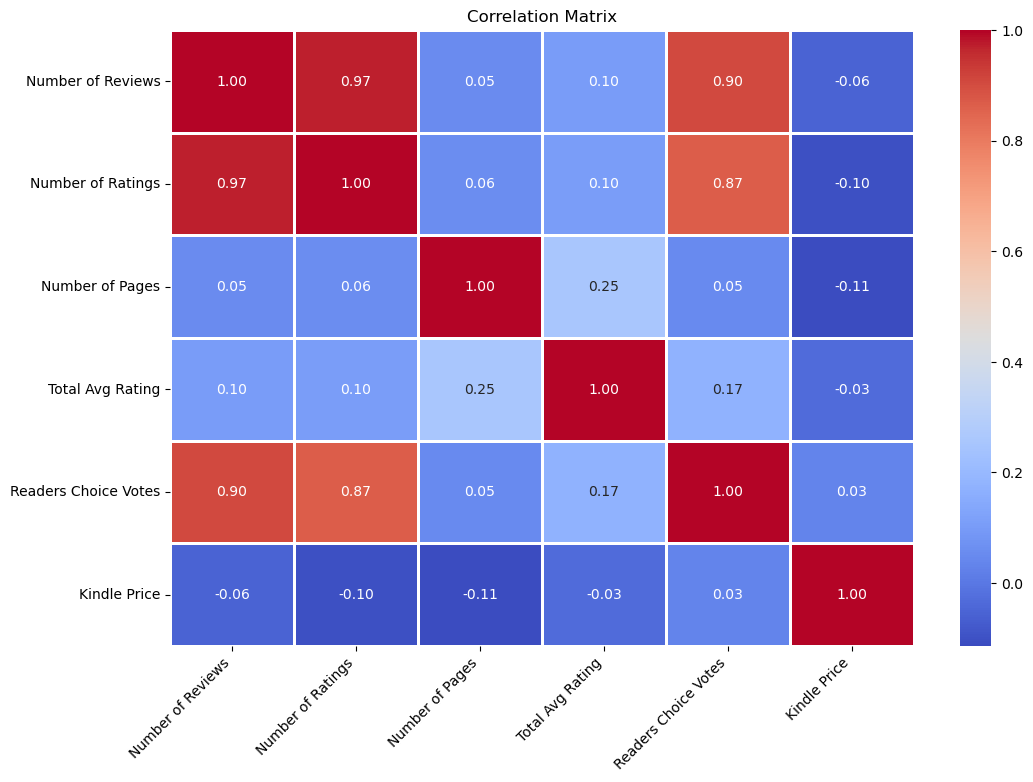

In [49]:
# Correlation analysis

col_interest = ['Number of Reviews','Number of Ratings','Number of Pages','Total Avg Rating','Readers Choice Votes','Kindle Price']

# Build correlation matrix

corr_matrix = df[col_interest].corr()


# Display the correlation matrix

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.75)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

The Readers Choice Votes have high correlations between Number of Reviews and Number of Ratings. Higher reviews and ratings correlate with higher votes. The price and thickness of the book doesn’t really affect the votes, ratings, and reviews (based on the weak correlation coefficients).